In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib import rcParams

%matplotlib inline
pd.options.display.max_columns = None


In [2]:
car = pd.read_csv("CrashReport2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,54,55,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292019 entries, 0 to 292018
Data columns (total 80 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    292019 non-null  object 
 1   geodb_oid   292019 non-null  int64  
 2   ROUTE       113528 non-null  object 
 3   YEAR        292019 non-null  int64  
 4   MONTH       292019 non-null  int64  
 5   DAY         292019 non-null  int64  
 6   HOUR        292019 non-null  int64  
 7   DAY_O_WEEK  292019 non-null  object 
 8   NUM_VEH     292019 non-null  int64  
 9   INJURIES    292019 non-null  int64  
 10  FATALITIES  292019 non-null  int64  
 11  COLL_TYPE   292019 non-null  object 
 12  WEATHER     284145 non-null  object 
 13  LIGHTING    285219 non-null  object 
 14  SURF_COND   281465 non-null  object 
 15  RD_DEFECT   254945 non-null  object 
 16  RD_FEATURE  292019 non-null  object 
 17  TRAF_CNTRL  287605 non-null  object 
 18  COUNTY      292019 non-null  int64  
 19  TO

In [4]:
car.head(5)

,OBJECTID,geodb_oid,ROUTE,YEAR,MONTH,DAY,HOUR,DAY_O_WEEK,NUM_VEH,INJURIES,FATALITIES,COLL_TYPE,WEATHER,LIGHTING,SURF_COND,RD_DEFECT,RD_FEATURE,TRAF_CNTRL,COUNTY,TOWNSHIP,TS_ROUTE,MILE,CITY,DRIVER_1,VEH1_TYPE,VEH1_SPECL,VEH1_DIR,VEH1_MANUV,VEH1_EVNT1,VEH1_LOC1,VEH1_EVNT2,VEH1_LOC2,VEH1_EVNT3,VEH1_LOC3,DRIVER_2,VEH2_TYPE,VEH2_SPECL,VEH2_DIR,VEH2_MANUV,VEH2_EVNT1,VEH2_LOC1,VEH2_EVNT2,VEH2_LOC2,VEH2_EVNT3,VEH2_LOC3,DRIVER_3,VEH3_TYPE,VEH3_SPECL,VEH3_DIR,VEH3_MANUV,VEH3_EVNT1,VEH3_LOC1,VEH3_EVNT2,VEH3_LOC2,VEH3_EVNT3,VEH3_LOC3,DRIVER_4,VEH4_TYPE,VEH4_SPECL,VEH4_DIR,VEH4_MANUV,VEH4_EVNT1,VEH4_LOC1,VEH4_EVNT2,VEH4_LOC2,VEH4_EVNT3,VEH4_LOC3,DUP_CD,REC_TYPE,XCOORD,YCOORD,INTERSEC,SFE,AGENCY_NUM,RUNDATE,WorkZone,WorkZoneTy,WorkersPre,ExceedSpee,CellPhoneU
0,1894,5331,NaN,14,3,5,12,Wed,1,0,0,Other Object,Clear,Daylight,Snow or Slush,No Defects,Not Applicable,No Controls,43,5,0,0.00,Unincorporated,Normal,Passenger,Personal,North,Skidding/Control Loss,Ran Off Roadway,Off Pavement - Right,Other Object,Off Pavement - Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000e+08,PD,2.173041e+06,2.124710e+06,N,X000079121,20043,2016090504,N,(N/A),N,N,N
1,3601,9379,NaN,14,3,19,6,Wed,1,0,0,Fixed Object,Rain,"Darkness, Lighted Road",Wet,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Commercial-Multi-Unit,East,Turning Left,Ran Off Roadway,Other,Guardrail End,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.014480e+06,1.853341e+06,N,C130096841,11051,2016090504,N,(N/A),N,N,N
2,4740,11829,NaN,14,1,9,21,Thu,1,0,0,Other Non-Collision,Clear,Darkness,Snow or Slush,No Defects,Not Applicable,NaN,81,8,0,0.00,Unincorporated,Normal,Passenger,Personal,West,Straight Ahead,Ran Off Roadway,Off Pavement - Left,Fire/Explosion,Off Pavement - Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.100000e+08,PD,2.257503e+06,1.843623e+06,Y,M2419584,20081,2016090504,N,(N/A),N,N,N
3,6347,15999,IL084,14,5,10,14,Sat,2,1,0,Rear End,Clear,Daylight,Dry,No Defects,Not Applicable,No Controls,98,1,5084,30.16,Albany,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Slow/Stop - Left Turn,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.850840e+08,B-Injury,2.280847e+06,1.865087e+06,Y,M2443053,30001,2016090504,N,(N/A),N,N,N
4,10776,28882,NaN,14,4,28,17,Mon,2,0,0,Sideswipe Same Direction,Rain,Daylight,NaN,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Other,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.015045e+06,1.848749e+06,N,C110178811,11051,2016090504,N,(N/A),N,N,N


In [5]:
car.describe()

,geodb_oid,YEAR,MONTH,DAY,HOUR,NUM_VEH,INJURIES,FATALITIES,COUNTY,TS_ROUTE,MILE,DUP_CD,XCOORD,YCOORD,AGENCY_NUM,RUNDATE
count,2.920190e+05,292019.0,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,2.920190e+05,2.920190e+05,2.920190e+05,292019.000000,2.920190e+05
mean,5.653341e+05,14.0,6.438341,15.352614,13.017300,1.869991,0.287392,0.003137,36.611871,2013.419617,30.620734,3.681322e+08,2.807454e+06,1.712982e+06,15899.361422,2.016091e+09
std,1.067269e+06,0.0,3.571892,8.755899,5.594693,0.580815,0.677750,0.061629,28.735929,3089.644853,64.296513,2.875539e+08,2.241654e+05,4.066943e+05,7250.743849,0.000000e+00
min,3.000000e+00,14.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+07,1.927759e+06,1.152106e+05,10005.000000,2.016091e+09
25%,1.380425e+05,14.0,3.000000,8.000000,9.000000,2.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.600000e+08,2.755127e+06,1.752016e+06,11051.000000,2.016091e+09
50%,2.143260e+05,14.0,6.000000,15.000000,14.000000,2.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.690941e+08,2.902607e+06,1.880197e+06,13300.000000,2.016091e+09
75%,3.192835e+05,14.0,10.000000,23.000000,17.000000,2.000000,0.000000,0.000000,54.000000,5025.000000,30.940000,5.420550e+08,2.963601e+06,1.935079e+06,20011.000000,2.016091e+09
max,3.768305e+06,14.0,12.000000,31.000000,23.000000,15.000000,54.000000,5.000000,102.000000,9474.000000,424.630000,1.029074e+09,3.051970e+06,2.130862e+06,99999.000000,2.016091e+09


In [6]:
car['REC_TYPE'].fillna('NDI', inplace = True)
cu = car[["HOUR","CellPhoneU"]]
cu = cu.groupby("CellPhoneU")
cu.head()

,HOUR,CellPhoneU
0,12,N
1,6,N
2,21,N
3,14,N
4,17,N
27898,16,Y
158002,13,Y
177668,15,Y
177680,15,Y
221031,17,Y


In [8]:
car['REC_TYPE'].fillna('NDI', inplace = True)
eu = car[["HOUR","ExceedSpee"]]
eu = eu.groupby("ExceedSpee")
eu.head()

,HOUR,ExceedSpee
0,12,N
1,6,N
2,21,N
3,14,N
4,17,N
22,1,Y
58,4,Y
65,8,Y
270,8,Y
302,11,Y


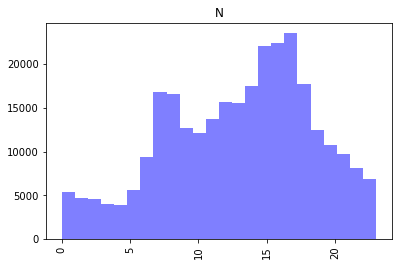

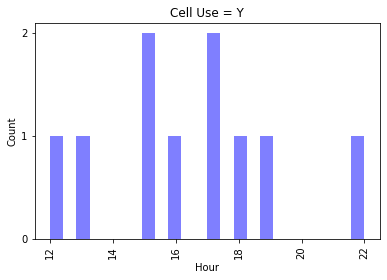

In [35]:
cu.hist(by = 'CellPhoneU', bins = 24, label = 'N', alpha = 0.5, color = 'b' )
plt.yticks(range(0,3))
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Cell Use = Y")
plt.show()

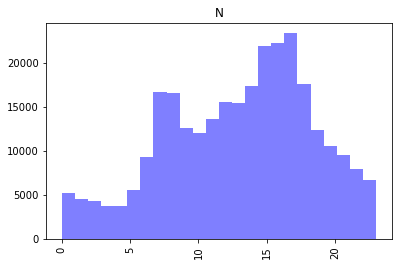

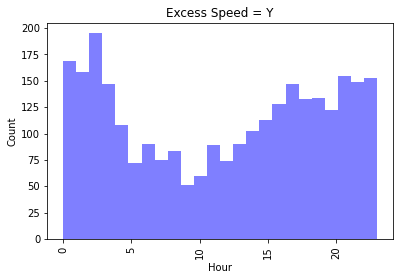

In [38]:
eu.hist(by = 'ExceedSpee', bins = 24, label = 'Y', alpha = 0.5, color = 'b' )
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Excess Speed = Y")
plt.show()
plt.show()

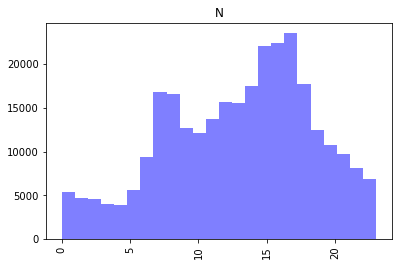

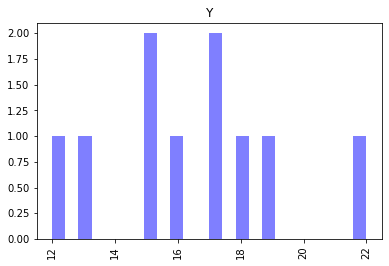

In [39]:
cu.hist(by = 'CellPhoneU', bins = 24, label = 'Y', alpha = 0.5, color = 'b' )
plt.show()

In [40]:
car['DATE'] = car.MONTH.map(str) + "-" + car.DAY.map(str) + "-" +'2014'
car['DATE'] = pd.to_datetime(car['DATE'], format='%m-%d-%Y')
car.head(5)

,OBJECTID,geodb_oid,ROUTE,YEAR,MONTH,DAY,HOUR,DAY_O_WEEK,NUM_VEH,INJURIES,FATALITIES,COLL_TYPE,WEATHER,LIGHTING,SURF_COND,RD_DEFECT,RD_FEATURE,TRAF_CNTRL,COUNTY,TOWNSHIP,TS_ROUTE,MILE,CITY,DRIVER_1,VEH1_TYPE,VEH1_SPECL,VEH1_DIR,VEH1_MANUV,VEH1_EVNT1,VEH1_LOC1,VEH1_EVNT2,VEH1_LOC2,VEH1_EVNT3,VEH1_LOC3,DRIVER_2,VEH2_TYPE,VEH2_SPECL,VEH2_DIR,VEH2_MANUV,VEH2_EVNT1,VEH2_LOC1,VEH2_EVNT2,VEH2_LOC2,VEH2_EVNT3,VEH2_LOC3,DRIVER_3,VEH3_TYPE,VEH3_SPECL,VEH3_DIR,VEH3_MANUV,VEH3_EVNT1,VEH3_LOC1,VEH3_EVNT2,VEH3_LOC2,VEH3_EVNT3,VEH3_LOC3,DRIVER_4,VEH4_TYPE,VEH4_SPECL,VEH4_DIR,VEH4_MANUV,VEH4_EVNT1,VEH4_LOC1,VEH4_EVNT2,VEH4_LOC2,VEH4_EVNT3,VEH4_LOC3,DUP_CD,REC_TYPE,XCOORD,YCOORD,INTERSEC,SFE,AGENCY_NUM,RUNDATE,WorkZone,WorkZoneTy,WorkersPre,ExceedSpee,CellPhoneU,DATE
0,1894,5331,NaN,14,3,5,12,Wed,1,0,0,Other Object,Clear,Daylight,Snow or Slush,No Defects,Not Applicable,No Controls,43,5,0,0.00,Unincorporated,Normal,Passenger,Personal,North,Skidding/Control Loss,Ran Off Roadway,Off Pavement - Right,Other Object,Off Pavement - Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000e+08,PD,2.173041e+06,2.124710e+06,N,X000079121,20043,2016090504,N,(N/A),N,N,N,2014-03-05
1,3601,9379,NaN,14,3,19,6,Wed,1,0,0,Fixed Object,Rain,"Darkness, Lighted Road",Wet,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Commercial-Multi-Unit,East,Turning Left,Ran Off Roadway,Other,Guardrail End,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.014480e+06,1.853341e+06,N,C130096841,11051,2016090504,N,(N/A),N,N,N,2014-03-19
2,4740,11829,NaN,14,1,9,21,Thu,1,0,0,Other Non-Collision,Clear,Darkness,Snow or Slush,No Defects,Not Applicable,NaN,81,8,0,0.00,Unincorporated,Normal,Passenger,Personal,West,Straight Ahead,Ran Off Roadway,Off Pavement - Left,Fire/Explosion,Off Pavement - Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.100000e+08,PD,2.257503e+06,1.843623e+06,Y,M2419584,20081,2016090504,N,(N/A),N,N,N,2014-01-09
3,6347,15999,IL084,14,5,10,14,Sat,2,1,0,Rear End,Clear,Daylight,Dry,No Defects,Not Applicable,No Controls,98,1,5084,30.16,Albany,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Slow/Stop - Left Turn,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.850840e+08,B-Injury,2.280847e+06,1.865087e+06,Y,M2443053,30001,2016090504,N,(N/A),N,N,N,2014-05-10
4,10776,28882,NaN,14,4,28,17,Mon,2,0,0,Sideswipe Same Direction,Rain,Daylight,NaN,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Other,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.015045e+06,1.848749e+06,N,C110178811,11051,2016090504,N,(N/A),N,N,N,2014-04-28


In [41]:
car.groupby('COLL_TYPE').size()

COLL_TYPE
Angle                           29849
Animal                          15646
Fixed Object                    33697
Head On                          2454
Other Non-Collision              2916
Other Object                     2756
Overturned                       3853
Parked Motor Vehicle            35276
Pedalcyclist                     3165
Pedestrian                       4343
Rear End                        84641
Sideswipe Opposite Direction     3646
Sideswipe Same Direction        27215
Train                              85
Turning                         42477
dtype: int64

In [42]:
car.groupby('TRAF_CNTRL').size()

TRAF_CNTRL
Delineators                155
Lane Use Marking         38648
No Controls             142722
No Passing                 630
Other                     1185
Other RR Crossing          216
Other Regualtory Sig       876
Other Warning Sign        1052
Police/Flagman             308
RR Crossing Gate           474
School Zone                109
Stop Sign/Flasher        30077
Traffic Signal           69973
Yield                     1180
dtype: int64

In [43]:
# Groupby collission type and sum the injuries and fatalities withing the group
ty = car.groupby('COLL_TYPE')['INJURIES', 'FATALITIES'].sum()

# Add a column 'critical' to sum the total critical collisions (injiries plus fatalities)
ty['critical'] = ty['INJURIES'] + ty['FATALITIES']

# Sort the collition types by critical accidents and take the top five types
ty_sort = ty.sort_values('critical',ascending = False).reset_index().head(5)

<ipython-input-43-1774d6c0406a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ty = car.groupby('COLL_TYPE')['INJURIES', 'FATALITIES'].sum()


In [44]:
# Add a 'critical' column to the car creash data set adding injuries and fatalities
car['critical'] = car['INJURIES'] +car['FATALITIES']

In [45]:
# Create a series from car dataset grouping by collission type (COLL_TYPE) and
# injury type 'REC_TYPE' and sum the critical column
# Filter all events with no injuries (PD)

ser=car[car.COLL_TYPE.isin(list(ty_sort.COLL_TYPE)) & (car.REC_TYPE != 'NDI') & (car.REC_TYPE != 'PD')].groupby(['COLL_TYPE', 'REC_TYPE'])['critical'].sum()
ser

COLL_TYPE     REC_TYPE
Angle         A-Injury     2348
              B-Injury     5627
              C-Injury     4323
              Fatal         192
Fixed Object  A-Injury     2236
              B-Injury     5439
              C-Injury     1827
              Fatal         399
Pedestrian    A-Injury      860
              B-Injury     2347
              C-Injury     1022
              Fatal         142
Rear End      A-Injury     2714
              B-Injury     9483
              C-Injury    13388
              Fatal         113
Turning       A-Injury     2658
              B-Injury     7322
              C-Injury     6067
              Fatal         175
Name: critical, dtype: int64

In [46]:
#Create a dataframe from the series object
df=ser.reindex(index=ser.index, level=0).unstack()
df

REC_TYPE,A-Injury,B-Injury,C-Injury,Fatal
COLL_TYPE,,,,
Angle,2348,5627,4323,192
Fixed Object,2236,5439,1827,399
Pedestrian,860,2347,1022,142
Rear End,2714,9483,13388,113
Turning,2658,7322,6067,175


Text(0, 0.5, 'Collision Type')

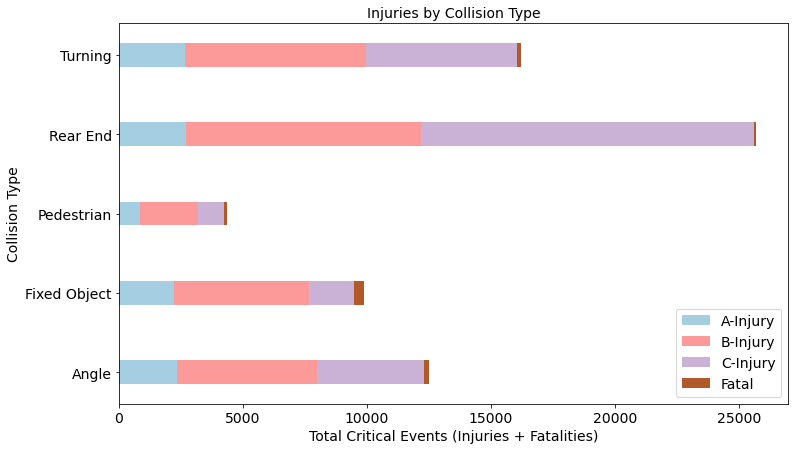

In [47]:
plot = df.plot(kind='barh', stacked=True, colormap='Paired', figsize=(12,7), width = 0.3)
plot.legend(loc='lower right',  fontsize=14)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.set_title('Injuries by Collision Type',fontsize= 14)

plot.set_xlabel("Total Critical Events (Injuries + Fatalities)", fontsize= 14)
plot.set_ylabel("Collision Type", fontsize= 14)

In [48]:
# Number of records that does not have a route populated
# Assumption is that the collisions in which route is not populated did not happen on an Interstate or a State highway
pd.isnull(car['ROUTE']).sum()

178491

In [49]:
# Fitering NaN value from route 
route = car[pd.notnull(car['ROUTE'])]

In [50]:
# All Interstate and State Highways recorded
route.ROUTE.unique()

array(['IL084', 'I 088', 'IL035', 'US012', 'I 090', 'US020', 'US041',
       'IL003', 'IL150', 'IL013', 'IL004', 'IL156', 'IL015', 'IL159',
       'IL154', 'IL155', 'IL096', 'US054', 'IL100', 'IL107', 'I 072',
       'IL106', 'IL016', 'IL108', 'US067', 'IL111', 'IL109', 'IL267',
       'IL078', 'I 072B', 'IL104', 'I 055', 'IL138', 'I 255', 'I 064',
       'I 070', 'IL203', 'IL157', 'IL158', 'IL015*', 'US050', 'IL140',
       'I 270', 'IL255', 'IL143', 'IL162', 'US040', 'IL161', 'IL163',
       'IL159*', 'IL111*', 'IL177', 'IL160', 'IL127', 'IL185', 'I 057',
       'US051', 'IL037', 'US051*', 'IL161*', 'IL048', 'IL029', 'I 055B',
       'IL128', 'IL121', 'IL033', 'US045', 'IL032', 'IL133', 'IL049',
       'IL130', 'IL250', 'US045*', 'IL146', 'I 024', 'IL147', 'IL166',
       'IL148', 'IL169', 'US060', 'US062', 'IL151', 'IL149', 'IL152',
       'IL153', 'IL014', 'IL142', 'IL013*', 'IL184', 'IL034', 'IL014*',
       'IL001', 'IL141', 'IL242', 'IL142*', 'IL145', 'US024', 'I 172',
       'U

In [51]:
# Remove the "*" in the route values as route names does not end with a "*"
route.ROUTE = route.ROUTE.str.replace("*",'')
route.ROUTE.unique()

<ipython-input-51-c9024fe054ac>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  route.ROUTE = route.ROUTE.str.replace("*",'')
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['IL084', 'I 088', 'IL035', 'US012', 'I 090', 'US020', 'US041',
       'IL003', 'IL150', 'IL013', 'IL004', 'IL156', 'IL015', 'IL159',
       'IL154', 'IL155', 'IL096', 'US054', 'IL100', 'IL107', 'I 072',
       'IL106', 'IL016', 'IL108', 'US067', 'IL111', 'IL109', 'IL267',
       'IL078', 'I 072B', 'IL104', 'I 055', 'IL138', 'I 255', 'I 064',
       'I 070', 'IL203', 'IL157', 'IL158', 'US050', 'IL140', 'I 270',
       'IL255', 'IL143', 'IL162', 'US040', 'IL161', 'IL163', 'IL177',
       'IL160', 'IL127', 'IL185', 'I 057', 'US051', 'IL037', 'IL048',
       'IL029', 'I 055B', 'IL128', 'IL121', 'IL033', 'US045', 'IL032',
       'IL133', 'IL049', 'IL130', 'IL250', 'IL146', 'I 024', 'IL147',
       'IL166', 'IL148', 'IL169', 'US060', 'US062', 'IL151', 'IL149',
       'IL152', 'IL153', 'IL014', 'IL142', 'IL184', 'IL034', 'IL001',
       'IL141', 'IL242', 'IL145', 'US024', 'I 172', 'IL057', 'IL110',
       'IL061', 'IL094', 'US136', 'IL099', 'IL101', 'IL103', 'IL135',
       'US034', 'I

In [52]:
# Create a dataframe of the top 10 routes by collisions
rt = route.groupby("ROUTE").size().sort_values(ascending = False).head(10)
# Group the top 10 routes by Route and Collision type
cl = route[route.ROUTE.isin(list(rt.index))].groupby(["ROUTE","COLL_TYPE"]).size()
cl = cl.reindex(index = cl.index, level = 0).unstack()

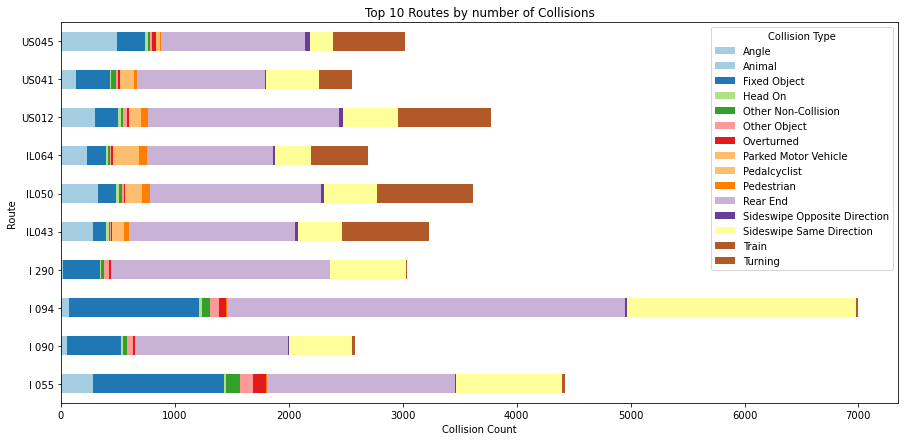

In [53]:
plot = cl.plot(kind='barh', stacked=True, colormap='Paired', figsize=(15,7))
plot.set_xlabel("Collision Count")
plot.set_ylabel("Route")
plot.legend(title = 'Collision Type')
plot.set_title("Top 10 Routes by number of Collisions")
pass

In [56]:
car.VEH1_MANUV.unique()

array(['Skidding/Control Loss', 'Turning Left', 'Straight Ahead',
       'Backing', 'Turning Right', 'Merging', 'Unknown',
       'Negotiating A Curve', 'U-Turn', 'Driving Wrong Way',
       'Slow/Stop In Traffic', 'Changing Lanes',
       'Entering Traffic Lane Fr', 'Parked', 'Other',
       'Slow/Stop - Left Turn', 'Enter From Drive/Alley',
       'Avoiding Vehicle/Objects', 'Slow/Stop - Load/Unload',
       'Slow/Stop - Right Turn', 'Passing/Overtaking', nan,
       'Starting In Traffic', 'Leaving Traffic Lane to', 'Driverless',
       'Turning On Red', 'Diverging', 'Parked In Traffic Lane'],
      dtype=object)

In [78]:
mns = car.groupby('VEH1_MANUV').size().sort_values(ascending = False).head(3)
# For all primary vehicles that skid or lost control group by the vehivle manuveour and surface condition
mn = car[car.VEH1_MANUV == 'Skidding/Control Loss'].groupby(["VEH1_MANUV","SURF_COND"]).size()
mn = mn.reindex(index = mn.index, level = 0).unstack()
mn

SURF_COND,Dry,Ice,Other,"Sand, Mud, Dirt",Snow or Slush,Wet
VEH1_MANUV,,,,,,
Skidding/Control Loss,5955,4747,151,59,6643,3495


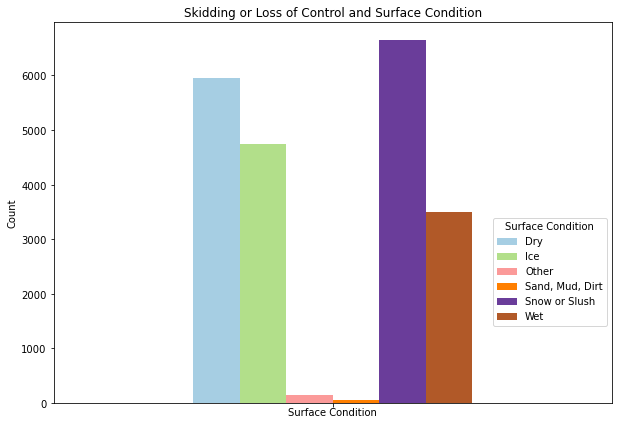

In [79]:
plot = mn.plot(kind='bar', stacked=False, colormap='Paired', figsize=(10,7))
plot.set_xlabel("Surface Condition")
plot.set_ylabel("Count")
plot.legend(title = 'Surface Condition', bbox_to_anchor=(1.0, 0.5))
plot.set_title("Skidding or Loss of Control and Surface Condition")
plot.tick_params(axis='x', labelbottom = False)
pass

In [80]:
car.groupby("CITY").size().sort_values(ascending = False)

CITY
Chicago           81480
Unincorporated    46329
Aurora             3758
Rockford           3599
Springfield        3458
                  ...  
Coulterville          1
Redmon                1
Ransom                1
Andover               1
Deer Grove            1
Length: 1131, dtype: int64

In [81]:
chi = car[car["CITY"] == 'Chicago']
uni = car[car["CITY"] == 'Unincorporated']
chicol = chi.groupby("COLL_TYPE").size()
chicolper = round(chicol*100/chicol.sum(),2)
ser2 = chicolper.to_frame()
unicol = uni.groupby("COLL_TYPE").size()
unicolper = round(unicol*100/unicol.sum(),2)
ser1 = unicolper.to_frame()

In [82]:
xaxis = list(unicolper.index)
ychi = list(chicolper.values)
yuni = list(unicolper.values)

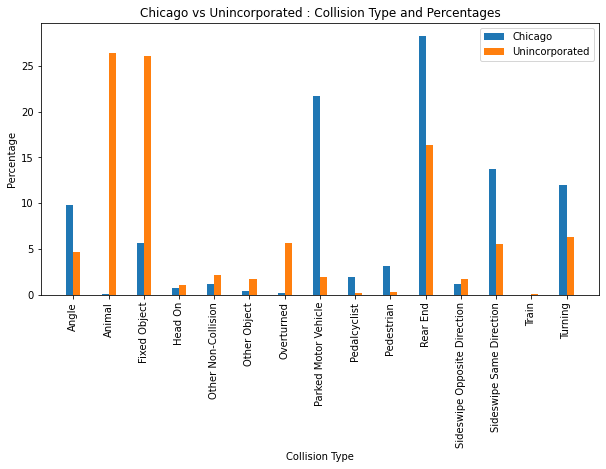

In [83]:
plt.figure(figsize=(10,5))

ind = np.arange(15)

width = 0.2       

plt.bar(ind, ychi , width, label='Chicago')
plt.bar(ind + width, yuni, width, label='Unincorporated')

plt.xlabel('Collision Type')
plt.ylabel('Percentage')
plt.title('Chicago vs Unincorporated : Collision Type and Percentages')

plt.xticks(ind + width / 2, tuple(xaxis), rotation='vertical')

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [84]:
# Conditional concatenation of Driver condition columns - 'DRIVER_1', 'DRIVER_2', 'DRIVER_3', 'DRIVER_4'
car['DRIVER_1'].fillna('Normal', inplace = True) # It should ne N/A instead of Normal but for the purpose of graphs/duplicate values defaulting it to Normal
car['DRIVER_2'].fillna('Normal', inplace = True)
car['DRIVER_3'].fillna('Normal', inplace = True)
car['DRIVER_4'].fillna('Normal', inplace = True)

sub1 = car[['DRIVER_1', 'DRIVER_2', 'DRIVER_3', 'DRIVER_4']]
car["DRIVER"] = sub1.astype(str).apply(lambda x: ' '.join(set(' '.join(x).split())), axis=1)

In [85]:
# Conditional concatenation of Vehicle Type columns - 'VEH1_TYPE', 'VEH2_TYPE', 'VEH3_TYPE', 'VEH4_TYPE'
car['VEH1_TYPE'].fillna('', inplace = True)
car['VEH2_TYPE'].fillna('', inplace = True)
car['VEH3_TYPE'].fillna('', inplace = True)
car['VEH4_TYPE'].fillna('', inplace = True)

sub2 = car[['VEH1_TYPE', 'VEH2_TYPE', 'VEH3_TYPE', 'VEH4_TYPE']]
car["VEH_TYPE"] = sub2.astype(str).apply(lambda x: ' '.join(set(' '.join(x).split())), axis=1)

In [86]:
# Conditional concatenation of Vehicle Speciality columns - 'VEH1_SPECL', 'VEH2_SPECL', 'VEH3_SPECL', 'VEH4_SPECL'
car['VEH1_SPECL'].fillna('', inplace = True)
car['VEH2_SPECL'].fillna('', inplace = True)
car['VEH3_SPECL'].fillna('', inplace = True)
car['VEH4_SPECL'].fillna('', inplace = True)

sub3 = car[['VEH1_SPECL', 'VEH2_SPECL', 'VEH3_SPECL', 'VEH4_SPECL']]
car["VEH_SPECL"] = sub3.astype(str).apply(lambda x: ' '.join(set(' '.join(x).split())), axis=1)

In [87]:
# Conditional concatenation of Vehicle Manuvre columns - 'VEH1_MANUV', 'VEH2_MANUV', 'VEH3_MANUV', 'VEH4_MANUV'
car['VEH1_MANUV'].fillna('', inplace = True)
car['VEH2_MANUV'].fillna('', inplace = True)
car['VEH3_MANUV'].fillna('', inplace = True)
car['VEH4_MANUV'].fillna('', inplace = True)

sub4 = car[['VEH1_MANUV', 'VEH2_MANUV', 'VEH3_MANUV', 'VEH4_MANUV']]
car["VEH_MANUV"] = sub4.astype(str).apply(lambda x: ' '.join(set(' '.join(x).split())), axis=1)

In [88]:
# Conditional concatenation of Vehicle Environment columns - 
cols = ['VEH1_EVNT1', 'VEH1_EVNT2', 'VEH1_EVNT3'
            ,'VEH2_EVNT1', 'VEH2_EVNT2', 'VEH2_EVNT3'
            ,'VEH3_EVNT1', 'VEH3_EVNT2', 'VEH3_EVNT3'
            ,'VEH4_EVNT1', 'VEH4_EVNT2', 'VEH4_EVNT3']
car['VEH1_EVNT1'].fillna('', inplace = True)
car['VEH1_EVNT2'].fillna('', inplace = True)
car['VEH1_EVNT3'].fillna('', inplace = True)
car['VEH2_EVNT1'].fillna('', inplace = True)
car['VEH2_EVNT2'].fillna('', inplace = True)
car['VEH2_EVNT3'].fillna('', inplace = True)
car['VEH3_EVNT1'].fillna('', inplace = True)
car['VEH3_EVNT2'].fillna('', inplace = True)
car['VEH3_EVNT3'].fillna('', inplace = True)
car['VEH4_EVNT1'].fillna('', inplace = True)
car['VEH4_EVNT2'].fillna('', inplace = True)
car['VEH4_EVNT3'].fillna('', inplace = True)

sub5 = car[['VEH1_EVNT1', 'VEH1_EVNT2', 'VEH1_EVNT3'
            ,'VEH2_EVNT1', 'VEH2_EVNT2', 'VEH2_EVNT3'
            ,'VEH3_EVNT1', 'VEH3_EVNT2', 'VEH3_EVNT3'
            ,'VEH4_EVNT1', 'VEH4_EVNT2', 'VEH4_EVNT3']]
car["VEH_EVNT"] = sub5.astype(str).apply(lambda x: ' '.join(set(' '.join(x).split())), axis=1)

In [89]:
trivial = car[(car['INJURIES'] == 0) & (car['FATALITIES'] == 0)]
serious = car[(car['INJURIES'] > 0) | (car['FATALITIES'] > 0)] #| (car['REC_TYPE'] != ('PD','Trivial'))

<AxesSubplot:xlabel='CITY'>

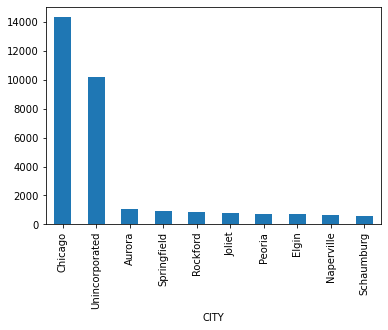

In [90]:
city_s = serious.groupby('CITY').size().sort_values(ascending = False)
city_s.head(10).plot.bar()

<AxesSubplot:xlabel='CITY'>

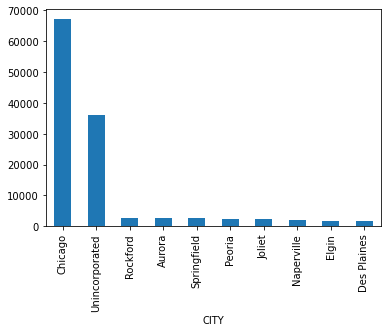

In [91]:
city_t = trivial.groupby('CITY').size().sort_values(ascending = False)
city_t.head(10).plot.bar()

<AxesSubplot:xlabel='CITY'>

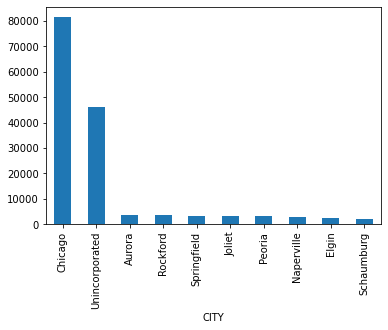

In [92]:
city_a = car.groupby('CITY').size().sort_values(ascending = False)
city_a.head(10).plot.bar()

<AxesSubplot:xlabel='INTERSEC'>

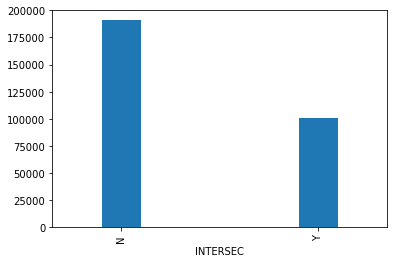

In [93]:
car.groupby('INTERSEC').size().plot.bar(width = 0.2)

<AxesSubplot:xlabel='INTERSEC'>

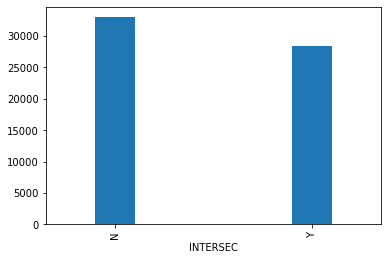

In [94]:
serious.groupby('INTERSEC').size().plot.bar(width = 0.2)

<AxesSubplot:xlabel='INTERSEC'>

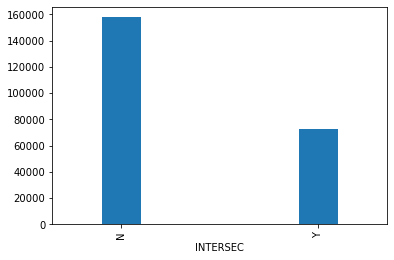

In [95]:
trivial.groupby('INTERSEC').size().plot.bar(width = 0.2)

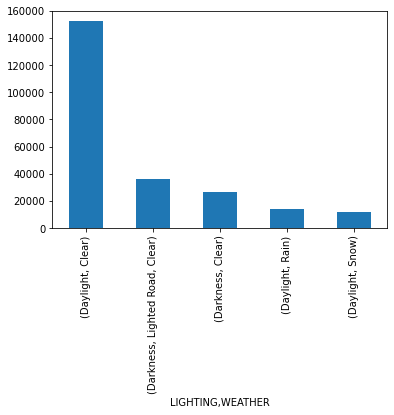

In [96]:
serious.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).plot.bar()
serw = list(serious.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5))

trivial.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).plot.bar()
triw = list(trivial.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5))

car.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).plot.bar()
allw = list(car.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5))

In [97]:
labels1 = list(car.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).index)
labels2 = list(serious.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).index)
labels3 = list(trivial.groupby(['LIGHTING','WEATHER']).size().sort_values(ascending = False).head(5).index)
labels1==labels2==labels3

True

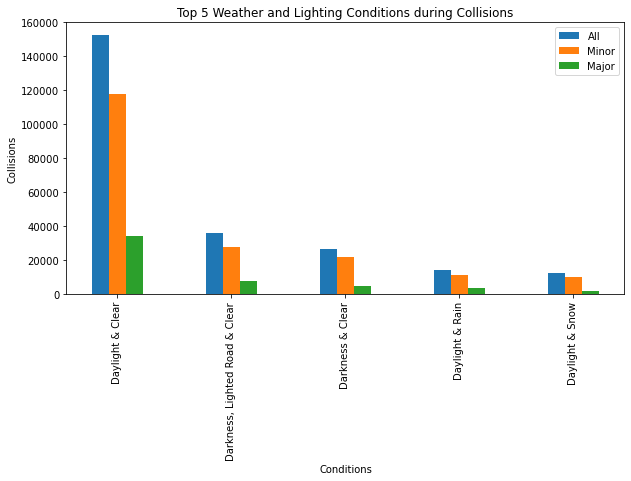

In [98]:
plt.figure(figsize=(10,5))

ind = np.arange(5)

width = 0.15

if labels1==labels2==labels3:
    labels = labels1
    
labels = [i[0] +" & "+ i[1]  for i in labels]
    

plt.bar(ind, allw , width, label='All')
plt.bar(ind + width, triw, width, label='Minor')
plt.bar(ind + 2*width, serw, width, label='Major')

plt.xlabel('Conditions')
plt.ylabel('Collisions')
plt.title('Top 5 Weather and Lighting Conditions during Collisions')

plt.xticks(ind + width, labels, rotation='vertical')

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [99]:
chiw = car[car['CITY']=='Chicago'].groupby(['LIGHTING','WEATHER']).size()

uniw = car[car['CITY']=='Unincorporated'].groupby(['LIGHTING','WEATHER']).size()

In [100]:
df1=chiw.reindex(index=chiw.index, level=0).unstack()
df2=uniw.reindex(index=uniw.index, level=0).unstack()
sert = serious.groupby(['INTERSEC', 'TRAF_CNTRL']).size().sort_values()
df3=sert.unstack()
trit = trivial.groupby(['INTERSEC', 'TRAF_CNTRL']).size().sort_values()
df4=trit.unstack()

In [101]:
df3 = df3.T
df3.reset_index(inplace = True)
df4 = df4.T
df4.reset_index(inplace = True)

In [102]:
data1 = df3.melt('TRAF_CNTRL', var_name='Intersection', value_name='Count')
data2 = df4.melt('TRAF_CNTRL', var_name='Intersection', value_name='Count')

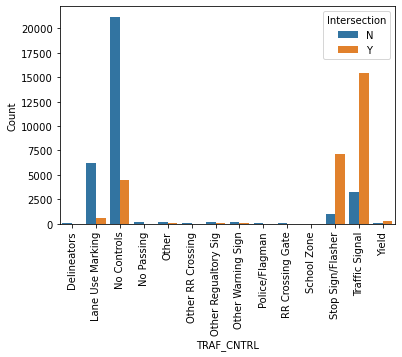

In [103]:
ax=sns.barplot(x='TRAF_CNTRL', y='Count', hue='Intersection', data=data1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
pass

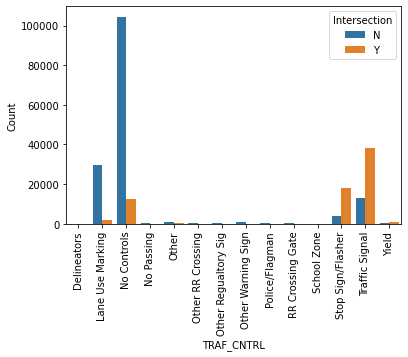

In [104]:
ax=sns.barplot(x='TRAF_CNTRL', y='Count', hue='Intersection', data=data2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
pass

In [105]:
cart = car.groupby(['INTERSEC', 'TRAF_CNTRL']).size().sort_values()
df5=cart.unstack()

In [106]:
df5 = df5.T
df5.reset_index(inplace = True)

In [107]:
data3 = df5.melt('TRAF_CNTRL', var_name='Intersection', value_name='Count')
data3["Percentage"] = round(data3["Count"]*100/data3.Count.sum(),2)

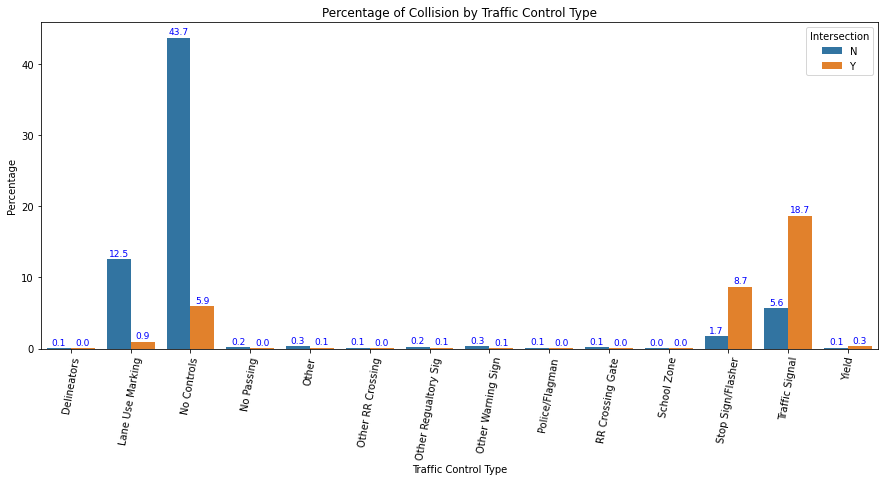

In [108]:
rcParams['figure.figsize'] = 15,6
ax=sns.barplot(x='TRAF_CNTRL', y='Percentage', hue='Intersection', data=data3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for a in ax.patches:
             ax.annotate("%.1f" % a.get_height(), (a.get_x() + a.get_width() / 2.,a.get_height()),
                 ha='center', va='center', fontsize=9, color='blue', xytext=(0,6),
                 textcoords='offset points')#,arrowprops=dict(arrowstyle="->",
                            #connectionstyle="arc3"))
ax.set_title('Percentage of Collision by Traffic Control Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_xlabel("Traffic Control Type")
plt.show()
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression of Vehicles involved in Collision and People Injuries/Fatalities')

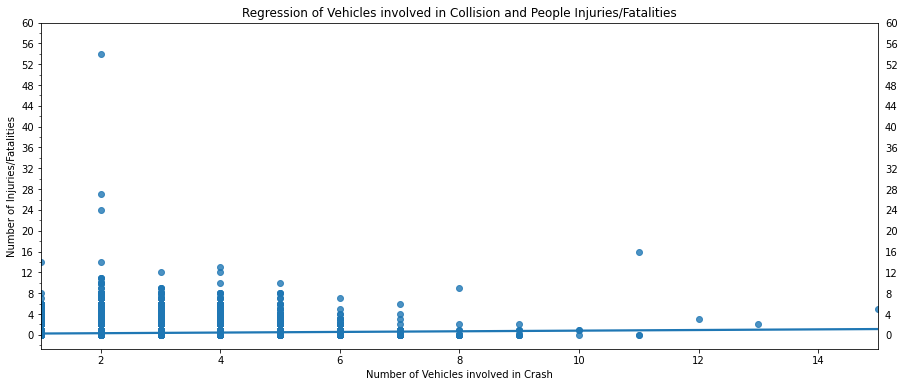

In [109]:
# Regression to find the best fit for the number of vehicles involed in crash and number of injuries and fatalities 
fig, ax = plt.subplots()
plot = sns.regplot('NUM_VEH','critical',data = car)
#plot.yaxis.set_major_locator(ticker.MaxNLocator(23))
plot.yaxis.set_major_locator(ticker.MultipleLocator(4))
plot.yaxis.set_minor_locator(ticker.MultipleLocator(2))
plot.tick_params(labeltop=False, labelright=True)
plot.set_ylim(ymax=60)
plot.set_xlabel("Number of Vehicles involved in Crash")
plot.set_ylabel("Number of Injuries/Fatalities")
plot.set_title("Regression of Vehicles involved in Collision and People Injuries/Fatalities")

In [117]:
col = pd.read_csv("CrashReport2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,54,55,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [124]:
coll = col.keys()

In [129]:
for i in col.keys():
    print(i, end = ", ")
   

OBJECTID, geodb_oid, ROUTE, YEAR, MONTH, DAY, HOUR, DAY_O_WEEK, NUM_VEH, INJURIES, FATALITIES, COLL_TYPE, WEATHER, LIGHTING, SURF_COND, RD_DEFECT, RD_FEATURE, TRAF_CNTRL, COUNTY, TOWNSHIP, TS_ROUTE, MILE, CITY, DRIVER_1, VEH1_TYPE, VEH1_SPECL, VEH1_DIR, VEH1_MANUV, VEH1_EVNT1, VEH1_LOC1, VEH1_EVNT2, VEH1_LOC2, VEH1_EVNT3, VEH1_LOC3, DRIVER_2, VEH2_TYPE, VEH2_SPECL, VEH2_DIR, VEH2_MANUV, VEH2_EVNT1, VEH2_LOC1, VEH2_EVNT2, VEH2_LOC2, VEH2_EVNT3, VEH2_LOC3, DRIVER_3, VEH3_TYPE, VEH3_SPECL, VEH3_DIR, VEH3_MANUV, VEH3_EVNT1, VEH3_LOC1, VEH3_EVNT2, VEH3_LOC2, VEH3_EVNT3, VEH3_LOC3, DRIVER_4, VEH4_TYPE, VEH4_SPECL, VEH4_DIR, VEH4_MANUV, VEH4_EVNT1, VEH4_LOC1, VEH4_EVNT2, VEH4_LOC2, VEH4_EVNT3, VEH4_LOC3, DUP_CD, REC_TYPE, XCOORD, YCOORD, INTERSEC, SFE, AGENCY_NUM, RUNDATE, WorkZone, WorkZoneTy, WorkersPre, ExceedSpee, CellPhoneU, 

In [127]:
coll

['OBJECTID',
 'geodb_oid',
 'ROUTE',
 'YEAR',
 'MONTH',
 'DAY',
 'HOUR',
 'DAY_O_WEEK',
 'NUM_VEH',
 'INJURIES',
 'FATALITIES',
 'COLL_TYPE',
 'WEATHER',
 'LIGHTING',
 'SURF_COND',
 'RD_DEFECT',
 'RD_FEATURE',
 'TRAF_CNTRL',
 'COUNTY',
 'TOWNSHIP',
 'TS_ROUTE',
 'MILE',
 'CITY',
 'DRIVER_1',
 'VEH1_TYPE',
 'VEH1_SPECL',
 'VEH1_DIR',
 'VEH1_MANUV',
 'VEH1_EVNT1',
 'VEH1_LOC1',
 'VEH1_EVNT2',
 'VEH1_LOC2',
 'VEH1_EVNT3',
 'VEH1_LOC3',
 'DRIVER_2',
 'VEH2_TYPE',
 'VEH2_SPECL',
 'VEH2_DIR',
 'VEH2_MANUV',
 'VEH2_EVNT1',
 'VEH2_LOC1',
 'VEH2_EVNT2',
 'VEH2_LOC2',
 'VEH2_EVNT3',
 'VEH2_LOC3',
 'DRIVER_3',
 'VEH3_TYPE',
 'VEH3_SPECL',
 'VEH3_DIR',
 'VEH3_MANUV',
 'VEH3_EVNT1',
 'VEH3_LOC1',
 'VEH3_EVNT2',
 'VEH3_LOC2',
 'VEH3_EVNT3',
 'VEH3_LOC3',
 'DRIVER_4',
 'VEH4_TYPE',
 'VEH4_SPECL',
 'VEH4_DIR',
 'VEH4_MANUV',
 'VEH4_EVNT1',
 'VEH4_LOC1',
 'VEH4_EVNT2',
 'VEH4_LOC2',
 'VEH4_EVNT3',
 'VEH4_LOC3',
 'DUP_CD',
 'REC_TYPE',
 'XCOORD',
 'YCOORD',
 'INTERSEC',
 'SFE',
 'AGENCY_NUM',
 'RUNDATE'